In [82]:
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Flatten , Dropout, Conv1D, Conv2D, Dense, BatchNormalization, MaxPooling1D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Zenia\Downloads\creditcard\credit_card.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Balancing data


In [17]:
non_fraud = df[df["Class"]==0]
fraud = df[df["Class"]==1]

In [18]:
non_fraud.shape

(284315, 31)

In [19]:
fraud.shape

(492, 31)

In [23]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape


(492, 31)

In [24]:
data = fraud.append(non_fraud, ignore_index=True)
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,128464.0,-0.599337,0.773647,-2.442939,-0.663638,0.137969,-1.196292,2.220912,-0.254931,-0.667426,...,0.468659,1.763956,0.347381,0.122198,-1.202258,0.654297,0.306155,0.165431,219.54,0
980,77085.0,1.197563,-1.586988,0.769298,-1.270574,-2.093644,-0.580658,-1.245788,0.010748,-1.746176,...,0.070382,0.250819,-0.087845,0.509080,0.205892,-0.143595,0.018699,0.039071,138.00,0
981,30441.0,-0.730249,1.294404,1.079275,1.327525,-0.184523,-0.001855,0.215344,0.567281,-0.377139,...,-0.003276,0.214264,-0.102655,0.082717,-0.087666,-0.219100,0.302560,0.140551,5.34,0
982,152055.0,2.086303,0.222409,-1.748963,0.371876,0.576037,-0.769118,0.246946,-0.280569,0.360922,...,-0.363851,-0.895797,0.308897,0.404924,-0.205204,0.178142,-0.056736,-0.029960,1.98,0


In [25]:
data.shape

(984, 31)

In [26]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [27]:
X = data.drop(["Class"], axis = 1)
y = data.Class

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 999 )

In [28]:
X_train.shape , X_test.shape


((787, 30), (197, 30))

In [29]:
X_train ## lot of variations in the values , so need to standardize it

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
501,66401.0,-0.815193,0.023007,1.298165,-1.731480,-0.446325,-0.614194,0.215468,-0.023127,-0.078885,...,0.043716,-0.020403,0.147898,-0.006783,-0.010678,-0.235974,-0.438389,0.171447,0.042717,18.20
267,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25
138,41851.0,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,0.427203,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90
573,132291.0,2.332897,-1.157843,-1.226381,-1.589924,-1.029658,-1.060648,-0.846828,-0.332536,-1.586552,...,-0.448979,0.101487,0.784693,0.165650,1.104856,0.041097,0.025165,-0.008447,-0.051642,2.00
483,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,37927.0,1.141121,-0.834660,0.194371,-0.619334,-1.107221,-0.935951,-0.317733,-0.177885,-1.160052,...,0.301953,0.346942,0.626069,-0.203258,0.572240,0.525051,-0.158466,-0.032730,0.022544,129.00
481,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-0.475126,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31
869,110482.0,1.864469,0.493920,0.417099,4.025990,-0.163492,0.155382,-0.445298,-0.012471,0.803897,...,-0.302677,-0.345965,-0.739863,0.442202,-0.126962,-0.584219,-0.421650,-0.016590,-0.030119,9.95
348,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[-0.44183575,  0.27185434, -0.49933722, ...,  0.09562233,
        -0.01279886, -0.37602715],
       [-0.0649683 ,  0.0720685 , -0.00649047, ...,  1.20884782,
         1.80941345,  1.76738794],
       [-0.96152882, -3.01962789,  2.03065209, ..., -3.48003814,
        -3.06225851,  0.15196317],
       ...,
       [ 0.4913044 ,  0.75317933, -0.37072895, ..., -0.09359773,
        -0.1837516 , -0.41181943],
       [ 0.32606105, -0.57900022,  1.04509903, ..., -0.37633393,
        -2.3338583 ,  0.06449986],
       [ 1.38716635,  0.65587034, -0.73609555, ..., -0.07423281,
         0.05683762,  1.0979639 ]])

In [39]:
X_test

array([[-1.48293657,  0.63199147, -0.2482777 , ..., -0.07996394,
         0.00387089, -0.43854433],
       [ 1.19512336, -0.03798769, -1.00510281, ..., -0.20296598,
        -0.85967517,  0.7924497 ],
       [-1.38890494, -2.8182413 ,  2.37797251, ...,  2.01426017,
        -3.46829298, -0.45064862],
       ...,
       [-0.01725391,  0.35279876, -0.2209237 , ..., -0.18880872,
        -0.23895466, -0.41277389],
       [-0.98125811, -0.07396915,  0.49341885, ...,  0.7583839 ,
         0.40023063,  0.03235189],
       [-0.33006469,  0.64294296, -0.44445453, ..., -0.06518916,
        -0.10268298, -0.39863051]])

In [40]:
y_train.shape

(787,)

In [41]:
y_train

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [57]:

#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()



In [58]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [59]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [60]:
X_train[0].shape

(30, 1)

In [61]:
epochs = 10

model = Sequential()

model.add(Conv1D( 32 , 2, activation= "relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [62]:
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [63]:
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

In [64]:
model.add(Dense(1, activation = "sigmoid") )

In [65]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [70]:
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/10
787/787 [==============================] - 5s 7ms/sample - loss: 0.4477 - accuracy: 0.8590 - val_loss: 0.4830 - val_accuracy: 0.8985
Epoch 2/10
787/787 [==============================] - 0s 624us/sample - loss: 0.2359 - accuracy: 0.9060 - val_loss: 0.4252 - val_accuracy: 0.9391
Epoch 3/10
787/787 [==============================] - 0s 624us/sample - loss: 0.2044 - accuracy: 0.9238 - val_loss: 0.4317 - val_accuracy: 0.7817
Epoch 4/10
787/787 [==============================] - 0s 634us/sample - loss: 0.2108 - accuracy: 0.9238 - val_loss: 0.3819 - val_accuracy: 0.8883
Epoch 5/10
787/787 [==============================] - 0s 614us/sample - loss: 0.1570 - accuracy: 0.9416 - val_loss: 0.3830 - val_accuracy: 0.8274
Epoch 6/10
787/787 [==============================] - 0s 615us/sample - loss: 0.1707 - accuracy: 0.9314 - val_loss: 0.3533 - val_accuracy: 0.8680
Epoch 7/10
787/787 [==============================] - 0s 607us/sample - loss: 0.

In [71]:
history.history

{'loss': [0.4477115897544609,
  0.23591621957596254,
  0.20439610436198974,
  0.21077173048916736,
  0.15699352348623313,
  0.17074204532114795,
  0.15862449730025768,
  0.149227874384296,
  0.13817498601944656,
  0.1943717631387135],
 'accuracy': [0.85895807,
  0.90597206,
  0.9237611,
  0.9237611,
  0.9415502,
  0.931385,
  0.94027954,
  0.94282085,
  0.9466328,
  0.93519694],
 'val_loss': [0.4830442279728536,
  0.4251885344534356,
  0.4316685007610902,
  0.3818962316827726,
  0.38302958571366247,
  0.35334586492044673,
  0.3023243032131098,
  0.28176921303502195,
  0.22460784691239372,
  0.2730819657066752],
 'val_accuracy': [0.89847714,
  0.9390863,
  0.7817259,
  0.88832486,
  0.8274112,
  0.8680203,
  0.9187817,
  0.9086294,
  0.93401015,
  0.9035533]}

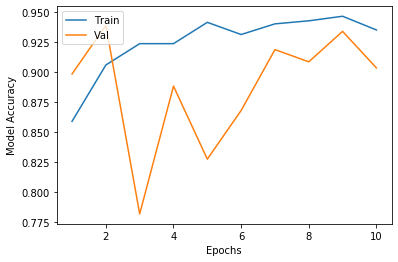

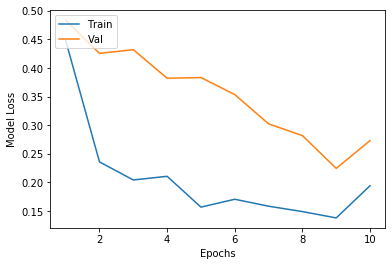

In [79]:
def plot_LearningCurve(history , epochs):
    
    epoch_range = range(1, epochs+1)
    
    plt.plot(epoch_range, history.history["accuracy"])
    plt.plot(epoch_range, history.history["val_accuracy"])
    
    plt.xlabel("Epochs")
    plt.ylabel("Model Accuracy")
    
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()



    plt.plot(epoch_range, history.history["loss"])
    plt.plot(epoch_range, history.history["val_loss"])
    
    plt.xlabel("Epochs")
    plt.ylabel("Model Loss")
    
    
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot_LearningCurve(history, epochs)

# Adding MaxPool

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 3s 4ms/sample - loss: 1.1697 - accuracy: 0.4867 - val_loss: 0.6398 - val_accuracy: 0.7360
Epoch 2/20
787/787 [==============================] - 0s 625us/sample - loss: 0.8486 - accuracy: 0.6341 - val_loss: 0.5928 - val_accuracy: 0.8173
Epoch 3/20
787/787 [==============================] - 0s 366us/sample - loss: 0.7421 - accuracy: 0.6557 - val_loss: 0.5601 - val_accuracy: 0.8071
Epoch 4/20
787/787 [==============================] - 0s 441us/sample - loss: 0.6340 - accuracy: 0.7090 - val_loss: 0.5332 - val_accuracy: 0.7716
Epoch 5/20
787/787 [==============================] - 0s 506us/sample - loss: 0.5825 - accuracy: 0.7471 - val_loss: 0.5057 - val_accuracy: 0.7716
Epoch 6/20
787/787 [==============================] - 0s 494us/sample - loss: 0.5194 - accuracy: 0.7726 - val_loss: 0.4781 - val_accuracy: 0.7868
Epoch 7/20
787/787 [==============================] - 0s 493us/sample - loss: 0.

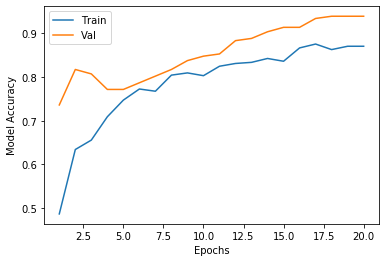

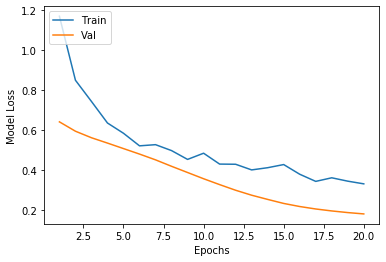

In [87]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


from tensorflow.keras.optimizers import Adam



model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_LearningCurve(history, epochs)